# 1 Deep Neural networks - Part 1: digit recognition
<p>We'll implement a Deep Neural network.</p>

At this point, we can play:
- Defining various networks, criterion functions, and optimizers.
- Test activation functions: Sigmoid,Tanh and Relu.

<ul>
    <li><a href="#data">Data</a></li>
    <li><a href="#model">Create the Model and loss criterion: Cross Entropy</a></li>
    <li><a href="#training">Training</a></li>
    <li><a href="#results">Results</a></li>
</ul>

In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(2)

## <a name="data" id="data">Data</a>

In [6]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [7]:
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

## <a name="model" id="model">Model: Neural networks and parameters</a>

In [ ]:
# Create the model class 1: Sigmoid as the activation function

class Net(nn.Module):
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self,x):
        x = torch.sigmoid(self.linear1(x)) 
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x

In [3]:
# Create the model class 2: Tanh as a activation function

class NetTanh(nn.Module):
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.tanh(self.linear1(x))
        x = torch.tanh(self.linear2(x))
        x = self.linear3(x)
        return x

In [5]:
# Create the model class 3: Relu as a activation function

class NetRelu(nn.Module):
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.relu(self.linear1(x))  
        x = torch.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [9]:
criterion = nn.CrossEntropyLoss()

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

In [15]:
# Set the parameters for the model

input_dim = 28 * 28  # Image size
hidden_dim1 = 50
hidden_dim2 = 50
output_dim = 10

total_epochs = 10

## <a name="training" id="training">Training</a>
**May take a few minutes**

In [16]:
# Define the training function
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}  
    
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
        
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
    
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    
    return useful_stuff

In [17]:
# Training: sigmoid as activation function

learning_rate = 0.01
model = Net(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=total_epochs)

In [21]:
# Train the model with tanh function

learning_rate = 0.01
model_Tanh = NetTanh(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model_Tanh.parameters(), lr=learning_rate)

training_results_tanh = train(model_Tanh, criterion, train_loader, validation_loader, optimizer, epochs=total_epochs)

In [19]:
# Train the model with relu function

learning_rate = 0.01
modelRelu = NetRelu(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)

training_results_relu = train(modelRelu, criterion, train_loader, validation_loader, optimizer, epochs=total_epochs)

## <a name="results" id="results">Results</a>

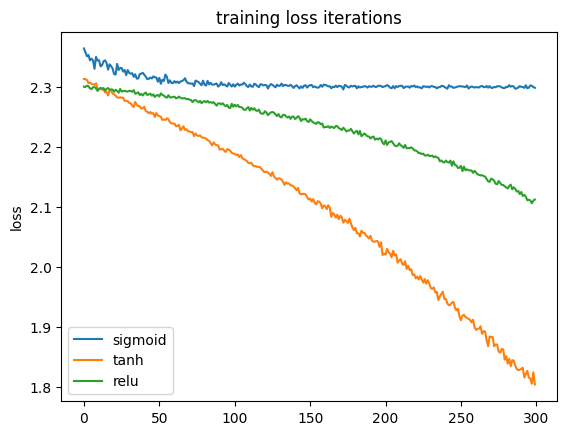

In [25]:
# Compare the training loss per activation function

plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_tanh['training_loss'], label='tanh')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

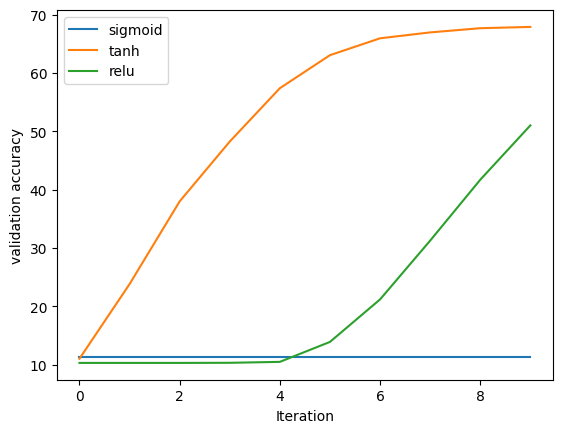

In [26]:
# Compare the validation loss

plt.plot(training_results['validation_accuracy'], label = 'sigmoid')
plt.plot(training_results_tanh['validation_accuracy'], label = 'tanh')
plt.plot(training_results_relu['validation_accuracy'], label = 'relu') 
plt.ylabel('validation accuracy')
plt.xlabel('Iteration')   
plt.legend()